# Anomaly detection using SVM


Anomaly based Intrusion Detection System, in the recent years, has become more dependent on learning methods - specially on classifications schemes. To make the classification more accurate and effective, hybrid approaches of combining with clustering techniques are often introduced. In this paper, a better combination is proposed to address problems of the previously proposed hybrid approach of combining k-Means/k-Medoids clustering technique with Naïve Bayes classification. In this new approach, the need of large samples by the previous approach is reduced by using Support Vector Machine while maintaining the high quality clustering of k-Medoids

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
#Import SVM from sci-kit learn
from sklearn import svm

In [7]:
def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)
#Import Dataset
tr_data = read_dataset('tr_server_data.csv')

In [8]:
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(tr_data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.05, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [9]:
pred = clf.predict(tr_data)

# inliers are labeled 1, outliers are labeled -1
normal = tr_data[pred == 1]
abnormal = tr_data[pred == -1]

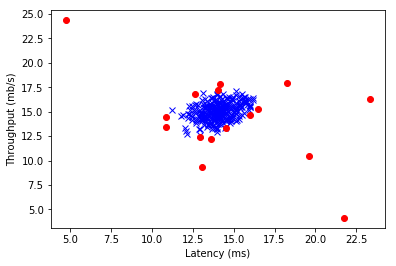

In [10]:
plt.figure()
plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()